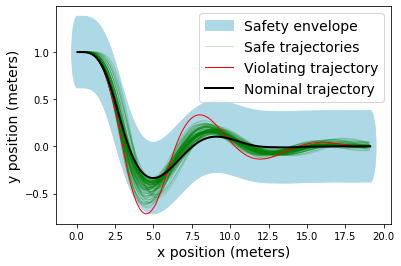

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

nominal = pd.read_csv("./statistical/nominal.tsv", sep="\t")

H = 150
K = 7

rand_runs = []
max_ds = []
for i in range(100):
    rand_runs.append(pd.read_csv(f"./statistical/H{H}_K{K}_{i}.tsv", sep="\t"))
    d = np.sqrt((rand_runs[i]['y'] - nominal['y'])**2 +
                (rand_runs[i]['x'] - nominal['x'])**2)
    max_ds.append(np.max(d))

d_ub = 0.38
max_dys = np.array(max_ds)
violations = max_dys > d_ub

fig, ax = plt.subplots()

for i, pt in nominal.iterrows():
    circle = plt.Circle((pt['x'], pt['y']), d_ub, color='lightblue',
                        label='Safety envelope' if i == 0 else None)
    ax.add_patch(circle)

first_label = True
for i, run in enumerate(rand_runs):
    if not violations[i]:
        plt.plot(run['x'], run['y'], alpha=0.2, color='green', linewidth=1,
                 label='Safe trajectories' if first_label else None)
        first_label = False

first_label = True
for i, run in enumerate(rand_runs):
    if violations[i]:
        plt.plot(run['x'], run['y'], alpha=1, color='red', linewidth=1,
                 label='Violating trajectory' if first_label else None)
        first_label = False

plt.plot(nominal['x'], nominal['y'], color='black', linewidth=2, label='Nominal trajectory')
plt.xlabel("x position (meters)")
plt.ylabel("y position (meters)")
ax.legend()

plt.rc('axes', labelsize=14)        # fontsize of the x and y labels\
plt.rc('legend', fontsize=14)       # legend fontsize

plt.savefig('f1tenth.pdf')